## 0. Célula de preparação


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionando a coluna identificadora para cada loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Unindo todos os dados em um único DataFrame
df_total = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

### Importação dos dados



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



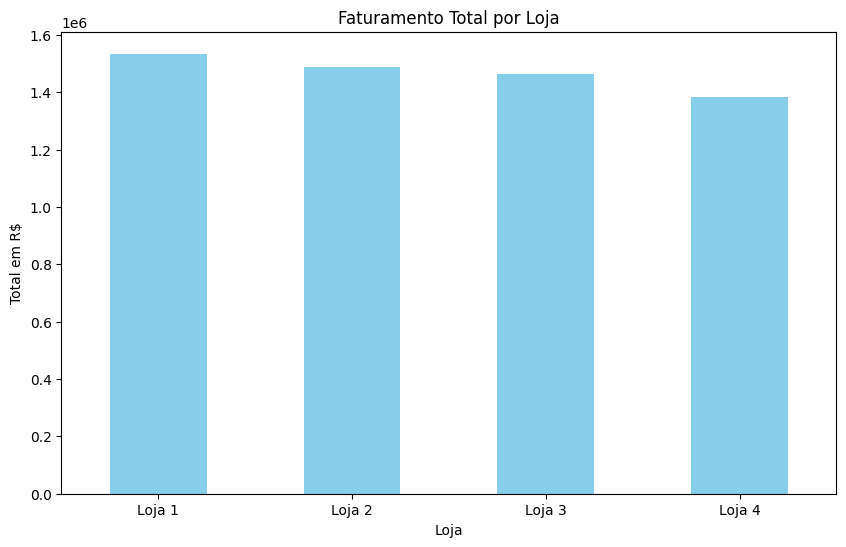

Faturamento Total:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


In [9]:

faturamento_loja = df_total.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
faturamento_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('Total em R$')
plt.xticks(rotation=0)
plt.show()

print(f"Faturamento Total:\n{faturamento_loja}")

# 2. Vendas por Categoria

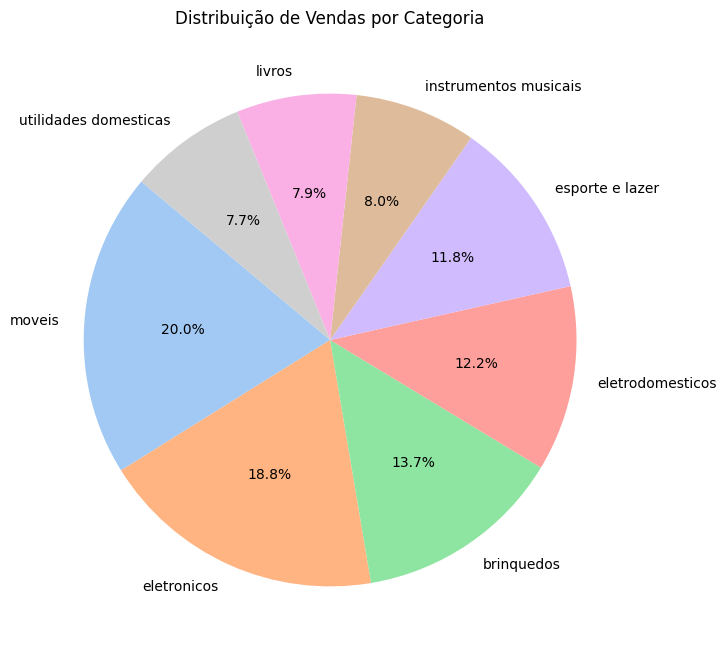

In [10]:

categorias = df_total['Categoria do Produto'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição de Vendas por Categoria')
plt.show()

# 3. Média de Avaliação das Lojas


/tmp/ipython-input-249713382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_aval.index, y=media_aval.values, palette='viridis')


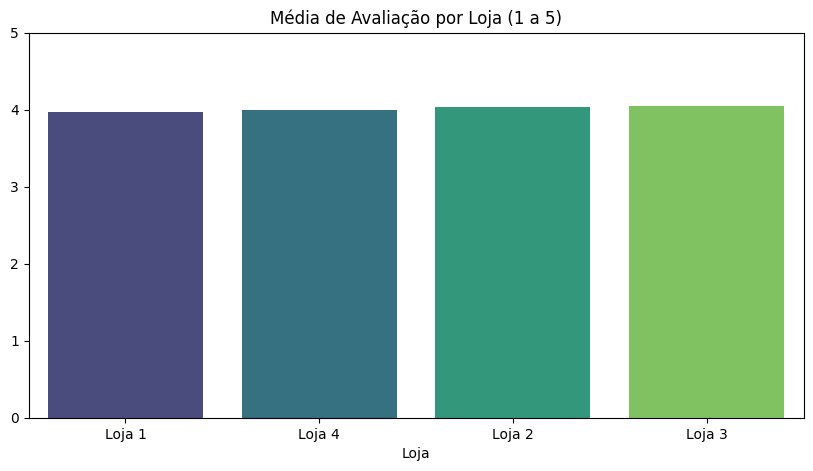

In [11]:
media_aval = df_total.groupby('Loja')['Avaliação da compra'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=media_aval.index, y=media_aval.values, palette='viridis')
plt.title('Média de Avaliação por Loja (1 a 5)')
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [12]:
top_produtos = df_total['Produto'].value_counts().head(5)
print("Top 5 Produtos Mais Vendidos:")
print(top_produtos)

piores_produtos = df_total['Produto'].value_counts().tail(5)
print("\n5 Produtos Menos Vendidos:")
print(piores_produtos)

Top 5 Produtos Mais Vendidos:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

5 Produtos Menos Vendidos:
Produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Frete Médio por Loja

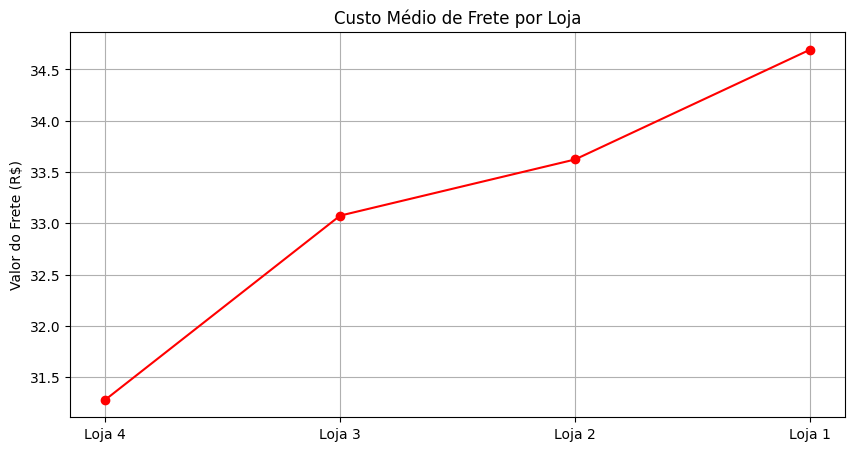

In [13]:
frete_medio = df_total.groupby('Loja')['Frete'].mean().sort_values()

plt.figure(figsize=(10, 5))
plt.plot(frete_medio.index, frete_medio.values, marker='o', linestyle='-', color='red')
plt.title('Custo Médio de Frete por Loja')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()

## Relatório:

Com base nos dados apresentados, a recomendação técnica é a venda da Loja 4.

Justificativa:

- Menor Desempenho Financeiro: A Loja 4 apresenta o pior faturamento total entre todas as unidades (aproximadamente R$ 150 mil a menos que a Loja 1).

- Baixo Retorno sobre Abrangência: Embora seja a loja com a maior cobertura geográfica e o frete mais baixo, esses fatores não se converteram em volume de vendas superior, indicando uma ineficiência na conversão de mercado.

- Avaliação Intermediária: Apesar de não ter a pior nota, ela não possui o destaque positivo da Loja 3 ou o volume financeiro da Loja 1, tornando-a o elo mais fraco para desinvestimento estratégico.

